# Linear Regression Assignment

### Submission by Santosh Kumar Ramarathnam

 ## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Data Dictionary

### Dataset characteristics

day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	
### License

Use of this dataset in publications must be cited to the following publication:

[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.


	  @article{year={2013},
      issn={2192-6352},
      journal={Progress in Artificial Intelligence},
      doi={10.1007/s13748-013-0040-3},
      title={Event labeling combining ensemble detectors and background knowledge},
      url={http://dx.doi.org/10.1007/s13748-013-0040-3},
      publisher={Springer Berlin Heidelberg}, 
      keywords={Event labeling; Event detection; Ensemble learning; Background knowledge},
      author={Fanaee-T, Hadi and Gama, Joao},
      pages={1-15}}


### Contact
	
For further information about this dataset please contact Hadi Fanaee-T (hadi.fanaee@fe.up.pt)

## Initial Overview of the Dataset

In [922]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFE
import re
import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings('ignore')


In [923]:
# Using pandas, read the source data into a dataframe
src = pd.read_csv('/content/drive/MyDrive/_upgrad/lra_bikes/day.csv', low_memory=False)

In [924]:
# Let's view the contets of the dataframe
src.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [925]:
src.shape

(730, 16)

In [926]:
src.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [927]:
src.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [928]:
src.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values in the dataset. 

## Data Preparation

1. Column Date has multiple patterns. Needs to be cleaned and formatted to the right data type.
2. Columns season and weahtersit have to mapped to categorical string values as per the dataset definition (they are not ordered). 
3. Rename column atemp to feelslike_t
4. Rename column temp to actual_t
5. Rename column hum to humid_percent
6. Assumption is windspeed is in metric km/hr. [We have no way of knowing this]
7. Drop unnecessary columns

In [929]:
src.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [930]:
# Fixing Date
src['date'] = pd.to_datetime(src['dteday'],dayfirst=True)
src.shape
src['day_of_month'] = src['date'].dt.day
src['month_of_year'] = src['date'].dt.month_name()
src['year'] = src['date'].dt.year
src['day_of_week']=src['date'].dt.day_name()

#dropping these variables as they have been extracted from the real date
src.drop('dteday', axis=1, inplace=True)
src.drop('yr', axis=1, inplace=True)
src.drop('mnth',axis=1, inplace=True)
src.drop('instant',axis=1, inplace=True)
src.drop('weekday',axis=1, inplace=True)
src.drop('date',axis=1, inplace=True)

#dropping working day as the data seems skewed or erroneous eg. Mon, Tue is marked as working day. 
src.drop('workingday',axis=1, inplace=True)

#dropping casual and registered - since they attribute to cnt, and the business problem doesn't differentiate between the two.
src.drop('casual',axis=1, inplace=True)
src.drop('registered',axis=1, inplace=True)

# Fixing Weather Situation and Season
src['weathersit']= src['weathersit'].map({1: "good_w", 2: "okay_w", 3: "lightbad_w", 4: "heavybad_w"})
src['season']= src['season'].map({1: "spring", 2: "summer", 3: "fall", 4: "winter"})
# Renaming Columns for better readability
src.rename(columns={"temp": "actual_t", "atemp": "feelslike_t", "hum" : "humidity_percent"},inplace=True, errors='raise')

In [931]:
src.isnull().sum()

season              0
holiday             0
weathersit          0
actual_t            0
feelslike_t         0
humidity_percent    0
windspeed           0
cnt                 0
day_of_month        0
month_of_year       0
year                0
day_of_week         0
dtype: int64

### Visualizing the data

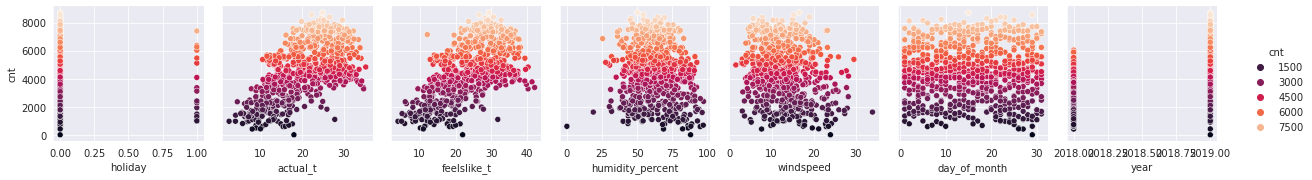

In [932]:
sns.pairplot(src, y_vars=['cnt'], hue="cnt",palette="rocket")
plt.show()

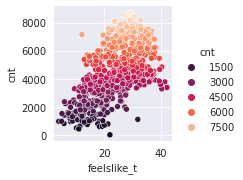

In [933]:
sns.pairplot(src, y_vars=['cnt'], x_vars=['feelslike_t'], hue="cnt",palette="rocket")
plt.show()

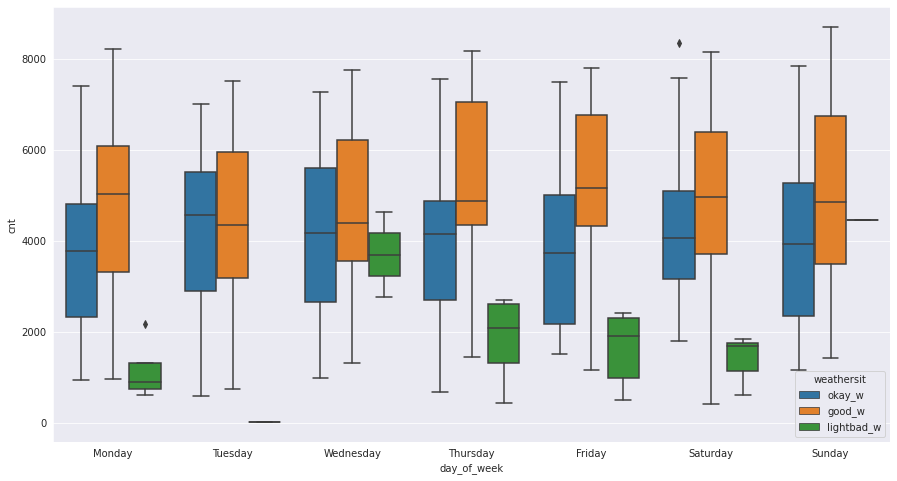

In [934]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = 'day_of_week', y = 'cnt', hue = 'weathersit', data = src)
plt.show()

Naturally, the rentals are higher with good weather. Okay weather sees a dip, with minimal to no rentals during lightly bad weather. 

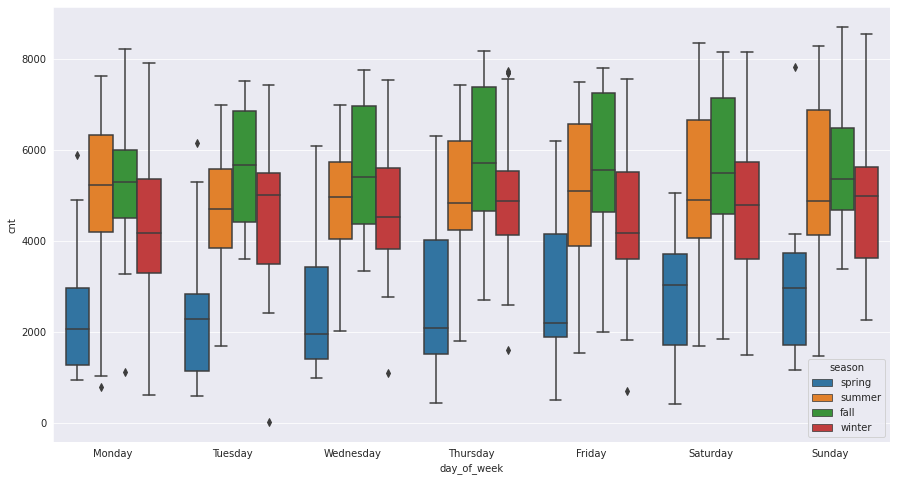

In [935]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = 'day_of_week', y = 'cnt', hue = 'season', data = src)
plt.show()

In general, it appears that fall and summer have more rentals than during winter and spring. 

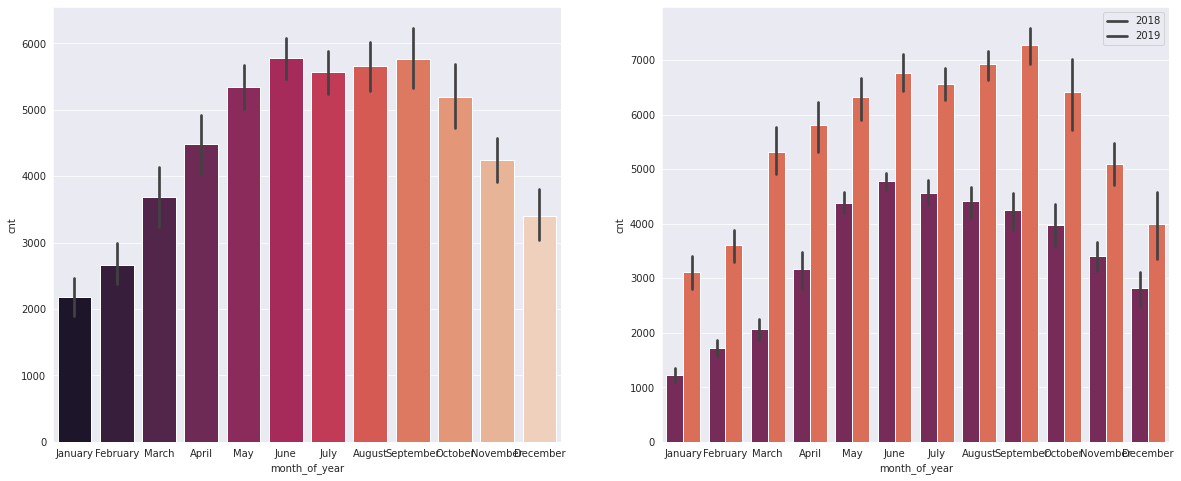

In [936]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.barplot('month_of_year','cnt',data=src, palette='rocket')
plt.subplot(1,2,2)
sns.barplot('month_of_year','cnt',data=src, hue='year',palette='rocket')
plt.legend(labels=['2018', '2019'])
plt.show()

It appears both years 2018, 2019 seem to show similar patterns of rentals across the calendar year. May to October seems to be the busiest season. 

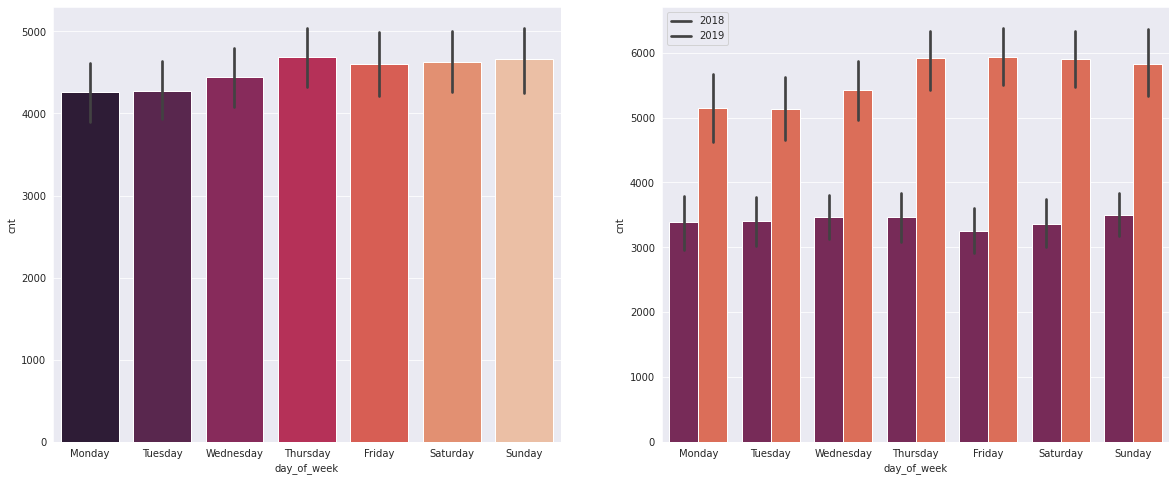

In [937]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.barplot('day_of_week','cnt',data=src, palette='rocket')
plt.subplot(1,2,2)
sns.barplot('day_of_week','cnt',data=src, hue='year',palette='rocket')
plt.legend(labels=['2018', '2019'])
plt.show()

The last 4 days seem to have slightly higher rentals than the first 3 days of the week. It seems natural, and more pronounced in 2019 than in 2018. In 2018, it appears that the rentals were more evenly spread.

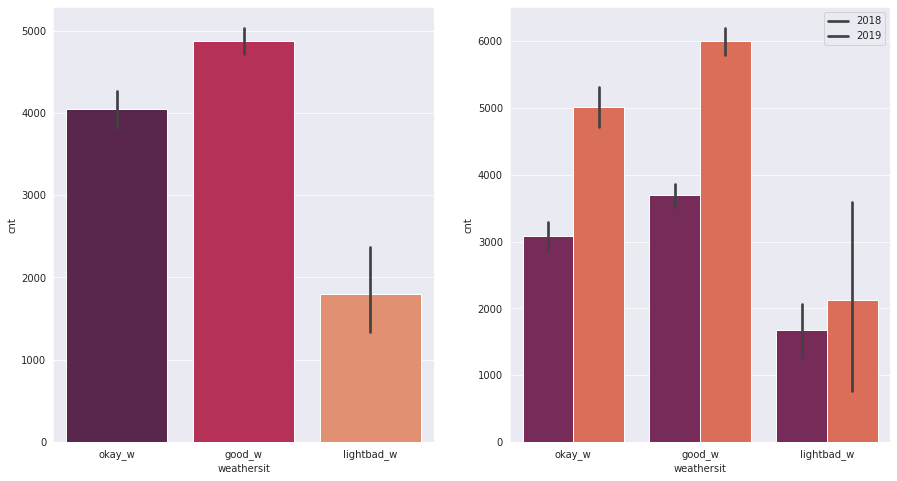

In [938]:
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
sns.barplot('weathersit','cnt',data=src, palette='rocket')
plt.subplot(1,2,2)
sns.barplot('weathersit','cnt',data=src, hue='year',palette='rocket')
plt.legend(labels=['2018', '2019'])
plt.show()

As noted previously, high rentals observed with good weather and okay weather. Light bad weather there is a significant dip in the rentals

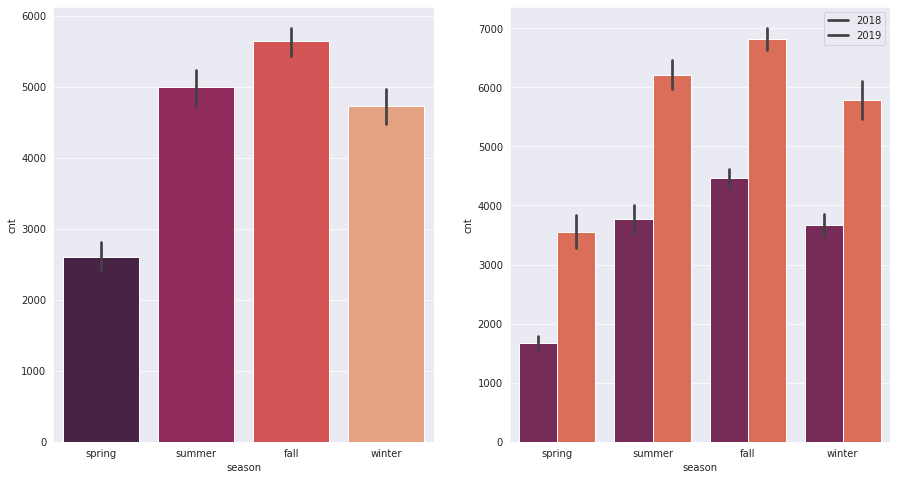

In [939]:
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
sns.barplot('season','cnt',data=src, palette='rocket')
plt.subplot(1,2,2)
sns.barplot('season','cnt',data=src, hue='year',palette='rocket')
plt.legend(labels=['2018', '2019'])
plt.show()

Surprising to note that spring rentals are actually low. It would be useful for the company to understand why. 
Fall and Summer seem more amenable to the business. Winter being higher than Spring certainly feels anomalous to general assumptions about seasons. 

### Getting Dummy Variables

In [940]:
season_df = pd.get_dummies(src['season'], drop_first=True)
weathersit_df = pd.get_dummies(src['weathersit'],drop_first=True)
monthofyear_df = pd.get_dummies(src['month_of_year'],drop_first=True)
dayofweek_df = pd.get_dummies(src['day_of_week'],drop_first=True)

In [941]:
cleandf = pd.concat([src,season_df,weathersit_df,monthofyear_df,dayofweek_df], axis=1)
# dropping the original categorical variables
cleandf.drop(['season','month_of_year','day_of_week','weathersit'],axis=1, inplace=True)
# reverting back year to 0 and 1
cleandf['year']= cleandf['year'].map({2018: 0, 2019: 1})
cleandf.drop('day_of_month',inplace=True,axis=1)

In [942]:
cleandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   holiday           730 non-null    int64  
 1   actual_t          730 non-null    float64
 2   feelslike_t       730 non-null    float64
 3   humidity_percent  730 non-null    float64
 4   windspeed         730 non-null    float64
 5   cnt               730 non-null    int64  
 6   year              730 non-null    int64  
 7   spring            730 non-null    uint8  
 8   summer            730 non-null    uint8  
 9   winter            730 non-null    uint8  
 10  lightbad_w        730 non-null    uint8  
 11  okay_w            730 non-null    uint8  
 12  August            730 non-null    uint8  
 13  December          730 non-null    uint8  
 14  February          730 non-null    uint8  
 15  January           730 non-null    uint8  
 16  July              730 non-null    uint8  
 1

Now, we are ready to use this data to create our linear regression model.

## Train/Test Data Split

In [943]:
np.random.seed(0)
df_train, df_test = train_test_split(cleandf, train_size=0.7, random_state = 100)

In [944]:
df_train.shape

(510, 29)

In [945]:
df_test.shape

(220, 29)

In [946]:
scaler = MinMaxScaler()

In [947]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
scaled_vars = ['actual_t', 'feelslike_t', 'humidity_percent', 'windspeed', 'cnt']
df_train[scaled_vars] = scaler.fit_transform(df_train[scaled_vars])

In [948]:
df_train.head()

,holiday,actual_t,feelslike_t,humidity_percent,windspeed,cnt,year,spring,summer,winter,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
576,0,0.815169,0.766351,0.725633,0.264686,0.827658,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
728,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
111,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [949]:
df_train.describe()

,holiday,actual_t,feelslike_t,humidity_percent,windspeed,cnt,year,spring,summer,winter,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.537440,0.513156,0.650480,0.320883,0.513499,0.507843,0.243137,0.247059,0.247059,...,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.157763,0.225858,0.212410,0.145846,0.169803,0.224421,0.500429,0.429398,0.431725,0.431725,...,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.542596,0.529718,0.653714,0.296763,0.518638,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.735215,0.688457,0.754830,0.414447,0.684710,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


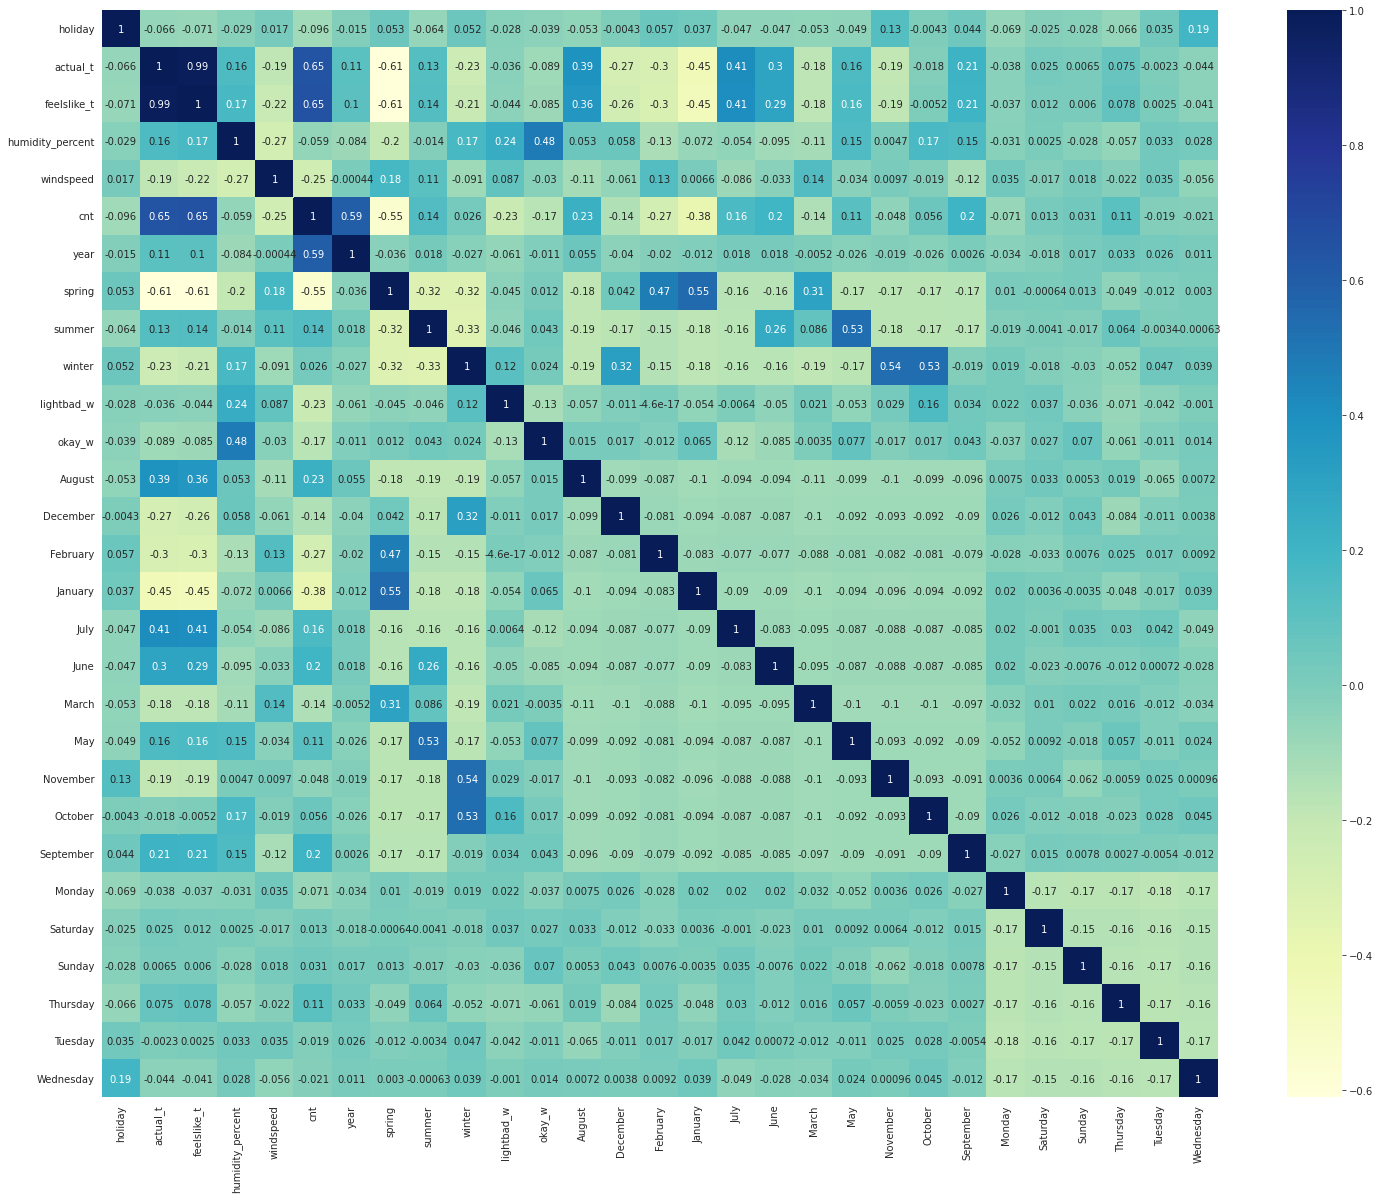

In [950]:
plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

It's super evident that feelslike_t and actual_t are strongly corelated and hence dropping one of them makes sense. It's useful to keep feelslike_t and drop actual_t.

In [951]:
df_train.drop('actual_t',inplace=True, axis=1)

In [952]:
y_train = df_train.pop('cnt')
X_train = df_train

In [953]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   holiday           510 non-null    int64  
 1   feelslike_t       510 non-null    float64
 2   humidity_percent  510 non-null    float64
 3   windspeed         510 non-null    float64
 4   year              510 non-null    int64  
 5   spring            510 non-null    uint8  
 6   summer            510 non-null    uint8  
 7   winter            510 non-null    uint8  
 8   lightbad_w        510 non-null    uint8  
 9   okay_w            510 non-null    uint8  
 10  August            510 non-null    uint8  
 11  December          510 non-null    uint8  
 12  February          510 non-null    uint8  
 13  January           510 non-null    uint8  
 14  July              510 non-null    uint8  
 15  June              510 non-null    uint8  
 16  March             510 non-null    uint8  


## Recursive Feature Selection

In [954]:
# Running RFE with the output number of the variable equal to 30
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,step=28)
rfe = rfe.fit(X_train, y_train)

In [955]:
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('feelslike_t', True, 1),
 ('humidity_percent', True, 1),
 ('windspeed', True, 1),
 ('year', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('lightbad_w', True, 1),
 ('okay_w', True, 1),
 ('August', True, 1),
 ('December', True, 1),
 ('February', False, 2),
 ('January', True, 1),
 ('July', False, 2),
 ('June', False, 2),
 ('March', False, 2),
 ('May', False, 2),
 ('November', False, 2),
 ('October', False, 2),
 ('September', True, 1),
 ('Monday', False, 2),
 ('Saturday', False, 2),
 ('Sunday', False, 2),
 ('Thursday', False, 2),
 ('Tuesday', False, 2),
 ('Wednesday', False, 2)]

In [956]:
rfecols = X_train.columns[rfe.support_]
rfecols

Index(['holiday', 'feelslike_t', 'humidity_percent', 'windspeed', 'year',
       'spring', 'winter', 'lightbad_w', 'okay_w', 'August', 'December',
       'January', 'September'],
      dtype='object')

In [957]:
X_train.columns[~rfe.support_]


Index(['summer', 'February', 'July', 'June', 'March', 'May', 'November',
       'October', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

In [958]:
X_train_rfe = X_train[rfecols]

### Model Iteration 1

In [959]:
X_train_lm = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_lm).fit()

In [960]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.34e-183
Time:                        11:36:08   Log-Likelihood:                 495.33
No. Observations:                 510   AIC:                            -962.7
Df Residuals:                     496   BIC:                            -903.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3676      0.032  

In [961]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,61.63
2,feelslike_t,2.98
6,spring,2.66
3,humidity_percent,1.88
7,winter,1.83
12,January,1.62
9,okay_w,1.56
8,lightbad_w,1.25
11,December,1.24
10,August,1.22


adjusted R2 score is good 82.9%. "August" has a very high p-value and is a good candidate for elimination.

Model Iteration 2

Dropping relevant columns

In [962]:
X_train_new = X_train_rfe.drop(['August'],axis=1)

In [963]:
X_train_lm = sm.add_constant(X_train_new)
lm2 = sm.OLS(y_train,X_train_lm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.3
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.09e-184
Time:                        11:36:09   Log-Likelihood:                 495.01
No. Observations:                 510   AIC:                            -964.0
Df Residuals:                     497   BIC:                            -909.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3666      0.032  

In [964]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,61.53
2,feelslike_t,2.84
6,spring,2.66
3,humidity_percent,1.88
7,winter,1.80
11,January,1.61
9,okay_w,1.56
8,lightbad_w,1.25
10,December,1.24
4,windspeed,1.21


In [965]:
X_train_lm.shape

(510, 13)

Looking at the above VIF < 5 for almost all of the features, adjusted R2 score of 82.9% and the p-value for all features is less than 0.05. We will go ahead with residual analysis and use the lm2 model

## Residual Analysis

In [966]:
y_train_pred = lm2.predict(X_train_lm)
res = (y_train - y_train_pred)

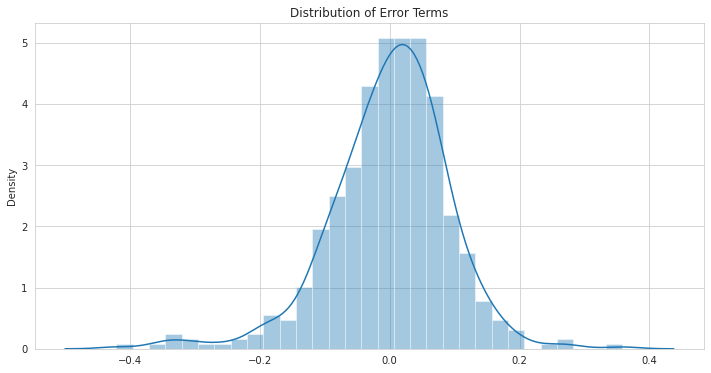

In [967]:
plt.figure(figsize = (12,6))
sns.set_style("whitegrid")
sns.distplot(res)
plt.title('Distribution of Error Terms')
plt.show()

Normality of the error terms is evident.

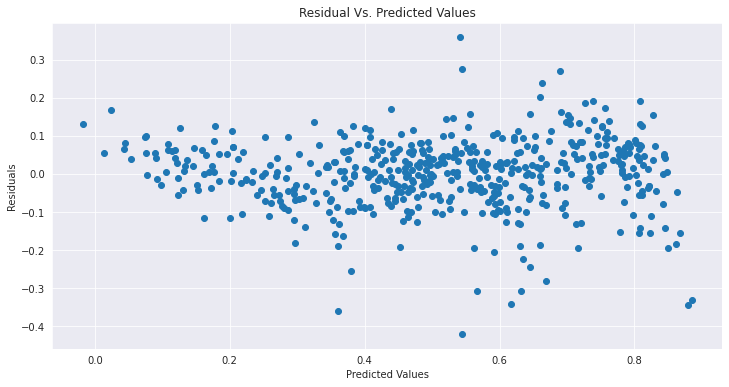

In [968]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
plt.scatter(y_train_pred,res)
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

There is no specific pattern in the error terms vs predicted values. They are independent of each other.

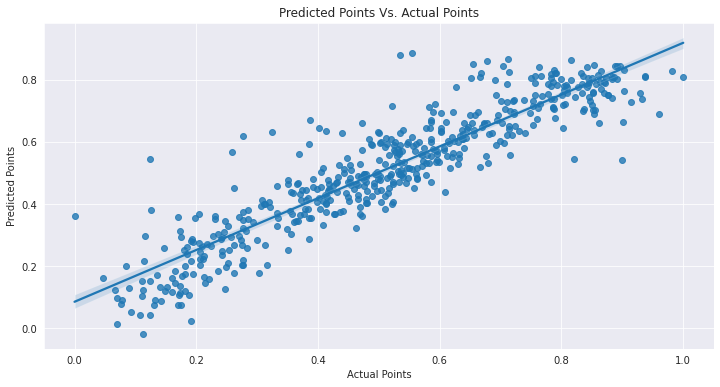

In [969]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()

## Model Evaluation on Test Data

In [970]:
df_test.shape

(220, 29)

In [971]:
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
scaled_vars = ['actual_t', 'feelslike_t', 'humidity_percent', 'windspeed', 'cnt']
df_test[scaled_vars] = scaler.fit_transform(df_test[scaled_vars])

In [972]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test = X_test[rfecols]
X_test_lm = sm.add_constant(X_test)
X_test_lm.head()

,const,holiday,feelslike_t,humidity_percent,windspeed,year,spring,winter,lightbad_w,okay_w,August,December,January,September
184,1.0,1,0.778767,0.534223,0.149393,0,0,0,0,1,0,0,0,0
535,1.0,0,0.855132,0.470417,0.231142,1,0,0,0,0,0,0,0,0
299,1.0,0,0.492359,0.777843,0.443398,0,0,1,0,1,0,0,0,0
221,1.0,0,0.805661,0.236659,0.449707,0,0,0,0,0,1,0,0,0
152,1.0,0,0.749249,0.070765,0.682387,0,0,0,0,0,0,0,0,0


In [973]:
X_test_lm.drop('August',inplace=True, axis=1)
X_test_lm.shape

(220, 13)

In [974]:
y_test_pred = lm2.predict(X_test_lm)
y_test_pred.sample(5)

491    0.626570
159    0.575284
278    0.516479
175    0.556775
677    0.661189
dtype: float64

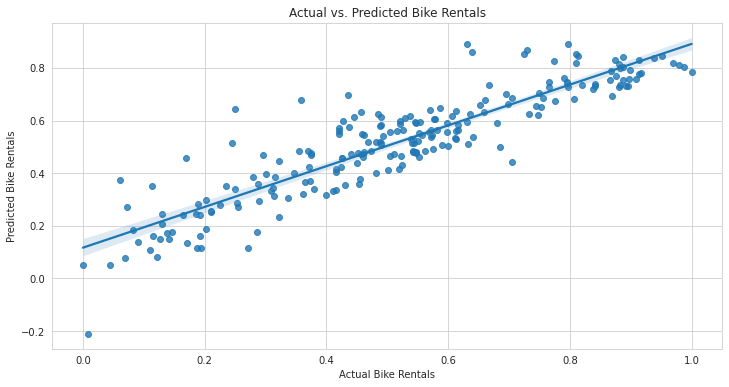

In [975]:
plt.figure(figsize = (12,6))
sns.set_style("whitegrid")
sns.regplot(x=y_test, y=y_test_pred)
plt.title('Actual vs. Predicted Bike Rentals')
plt.xlabel('Actual Bike Rentals')
plt.ylabel('Predicted Bike Rentals')
plt.show()

In [976]:
r2_score(y_test,y_test_pred)

0.8114074414813364

The final model accuracy is 81.14%

In [979]:
coeff = round(lm2.params,2)
sorted_coeff = coeff.sort_values(ascending = False)
sorted_coeff

feelslike_t         0.41
const               0.37
year                0.23
September           0.07
winter              0.05
December           -0.03
January            -0.05
okay_w             -0.06
holiday            -0.09
spring             -0.11
humidity_percent   -0.13
windspeed          -0.16
lightbad_w         -0.25
dtype: float64

In [980]:
for i in range(0, len(sorted_coeff)):
    print(sorted_coeff[i],'*',sorted_coeff.index[i],end ='')
    print(' + ',end ='')

0.41 * feelslike_t + 0.37 * const + 0.23 * year + 0.07 * September + 0.05 * winter + -0.03 * December + -0.05 * January + -0.06 * okay_w + -0.09 * holiday + -0.11 * spring + -0.13 * humidity_percent + -0.16 * windspeed + -0.25 * lightbad_w + 

The equation of the model: 

0.41 * feelslike_t + 0.23 * year + 0.07 * September + 0.05 * winter - 0.03 * December - 0.05 * January - 0.06 * okay_w + -0.09 * holiday - 0.11 * spring - 0.13 * humidity_percent - 0.16 * windspeed - 0.25 * lightbad_w + 0.37


## Conclusions

1.  Feels like temperature is a big factor in the demand for rentals. While this is out of anyone's hands, Boom Bikes should ensure bike availability during days when the temperature is higher. 

2. Bad weather (event light snow/rain), Higher windspeeds, Higher humidity are the major negative factors driving rentals down. 

3. Boom Bikes has a big opportunity to understand why spring demand for rentals is low and use this to understand any reasons not currently in the data set. 

4. Year over Year - the growth has been significant for Boom Bikes, however, 2 years is too small to draw a macro-trending statement. They can be cautiously optimistic that business could grow in 2020, but external factors such as government mandated quarantines etc. are not modeled in the current version of this demand model.

